In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Rosenbrock function
f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

##### gradient descent

In [ ]:
class gradient_descent:
  def __init__(self):
    self.w = np.array([5,5]).astype(float) #initial location

  @property
  def func_value(self):
    x,y = self.w
    return (1-x) ** 2 + 100*((y-x**2)**2)

  def _steepest_direction(self,location):
    x,y = location
    return np.array([2+400*(x**2 - y) + 800*(x**2),200*(y-(x**2))])

  def _update(self,alpha,p):
    self.w -= alpha * p

  def run_epoch(self,n_epoch,alpha):

    self.fun_val = []
    self.loc = []

    for _ in range(n_epoch):

      self.fun_val.append(self.func_value)
      current_location = copy.deepcopy(self.w)
      self.loc.append(current_location)

      p = self._steepest_direction(current_location)
      self._update(alpha,p)
    
    self.loc = np.array(self.loc)

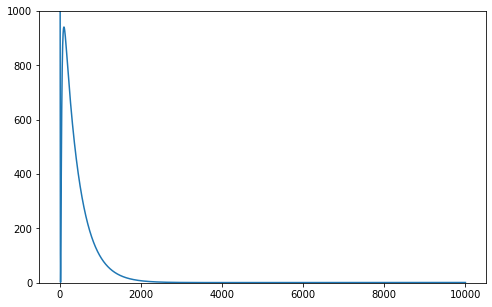

In [ ]:
gd = gradient_descent()
gd.run_epoch(10000,1e-5)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.plot(gd.fun_val)
ax.set_ylim(0,1000)

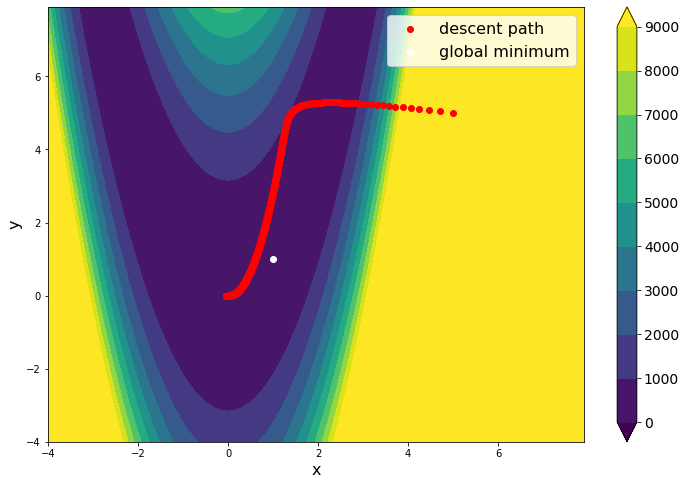

In [ ]:
x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Gradient descent',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 

ax.scatter((gd.loc)[:,0],(gd.loc)[:,1],marker='o',color='red',label='descent path')
ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

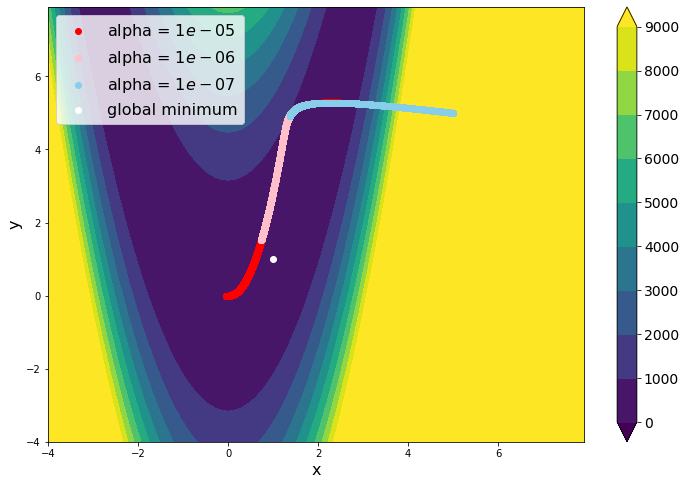

In [ ]:
# sensitivity to learning rate
alphas = [1e-5,1e-6,1e-7]
locs=[]

for alpha in alphas:
  gd = gradient_descent()
  gd.run_epoch(10000,alpha)
  locs.append(gd.loc)

x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Gradient descent',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 

ax.scatter(locs[0][:,0],locs[0][:,1],marker='o',color='red',label=f'alpha = ${alphas[0]}$')
ax.scatter(locs[1][:,0],locs[1][:,1],marker='o',color='pink',label=f'alpha = ${alphas[1]}$')
ax.scatter(locs[2][:,0],locs[2][:,1],marker='o',color='skyblue',label=f'alpha = ${alphas[2]}$')

ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

##### momentum

In [ ]:
class momentum_gd:
  def __init__(self):
    self.w = np.array([5,5]).astype(float)
    self.mo = np.zeros((2,)) # momentum

  @property
  def func_value(self):
    x,y = self.w
    return (1-x) ** 2 + 100*((y-x**2)**2)

  def _steepest_direction(self,location):
    x,y = location
    return np.array([2*(x-1) - 400*x*(y - x**2), 200*(y-(x**2))])

  def _update_momentum(self,beta,p):
    self.mo = self.mo * beta + p

  def _update(self,alpha,p):
    self.w -= alpha * self.mo

  def run_epoch(self,n_epoch,alpha,beta):
    self.fun_val = []
    self.loc = []

    for _ in range(n_epoch):

      self.fun_val.append(self.func_value)

      current_location = copy.deepcopy(self.w)
      self.loc.append(current_location)
      p = self._steepest_direction(current_location)
      self._update_momentum(beta,p)
      self._update(alpha,p)

    self.loc = np.array(self.loc)

(0.0, 1000.0)

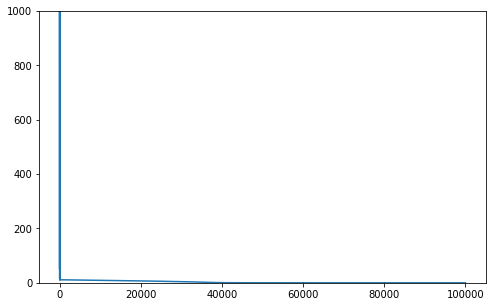

In [ ]:
gdm = momentum_gd()
gdm.run_epoch(int(1e5),1e-5,.9)
# gdm.w
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.plot(gdm.fun_val)
ax.set_ylim(0,1000)

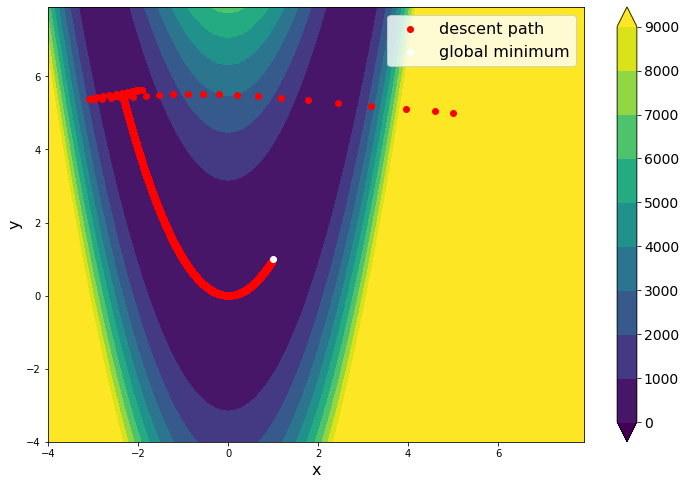

In [ ]:
x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Gradient descent with momentum',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 

ax.scatter((gdm.loc)[:,0],(gdm.loc)[:,1],marker='o',color='red',label='descent path')
ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

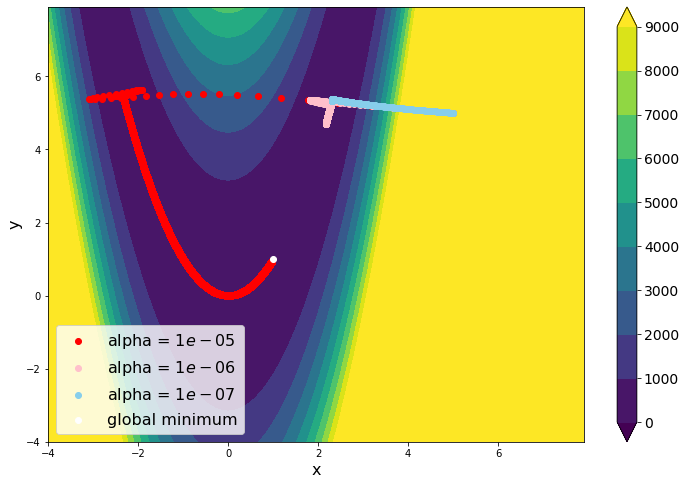

In [ ]:
# sensitivity to learning rate
alphas = [1e-5,1e-6,1e-7]
locs=[]

for alpha in alphas:
  gdm = momentum_gd()
  gdm.run_epoch(int(1e5),alpha,.9)
  locs.append(gdm.loc)

x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)
X, Y = np.meshgrid(x, y)
f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)
Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Gradient descent',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 

ax.scatter(locs[0][:,0],locs[0][:,1],marker='o',color='red',label=f'alpha = ${alphas[0]}$')
ax.scatter(locs[1][:,0],locs[1][:,1],marker='o',color='pink',label=f'alpha = ${alphas[1]}$')
ax.scatter(locs[2][:,0],locs[2][:,1],marker='o',color='skyblue',label=f'alpha = ${alphas[2]}$')

ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

##### conjugate gradient

In [ ]:
class conjugate_gradient:
  def __init__(self):
    self.w = np.array([5,5]).astype(float)

  @property
  def func_value(self):
    x,y = self.w
    return (1-x) ** 2 + 100*((y-x**2)**2)

  def _steepest_direction(self,location):
    x,y = location
    return np.array([2*(x-1) - 400*x*(y - x**2), 200*(y-(x**2))])

  def _beta(self, g_new,g_old):
    return g_new @ g_new /(g_old @ g_old)

  def _conjugate_direction(self,beta,p,g):
    return -g + beta * p

  def _update(self,alpha,p):
    self.w += alpha * p


  def run_epoch(self,n_epoch,alpha):

    # initialise
    g_old = self._steepest_direction(self.w)
    p_old = copy.deepcopy(-g_old)
    k = 0

    self.fun_val = []
    self.loc = []

    for _ in range(n_epoch):

      # collect statistics
      current_location = copy.deepcopy(self.w)
      self.fun_val.append(self.func_value)
      self.loc.append(current_location)

      # descent
      self._update(alpha,p_old)

      # compute conjugate direction
      g_new = self._steepest_direction(self.w)
      b = self._beta(g_new,g_old)
      p_new = self._conjugate_direction(b,p_old,g_new)

      # update statistics
      k+=1
      g_old = copy.deepcopy(g_new)
      p_old = copy.deepcopy(p_new)

    self.loc = np.array(self.loc)

(0.0, 1000.0)

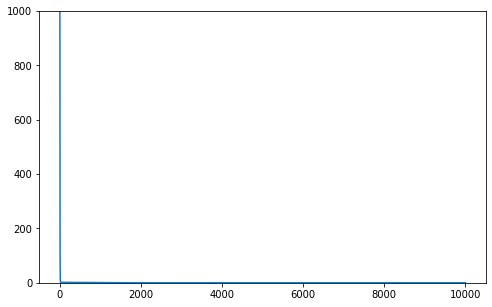

In [ ]:
cgd = conjugate_gradient()
cgd.run_epoch(10000,1e-5)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.plot(cgd.fun_val)
ax.set_ylim(0,1000)

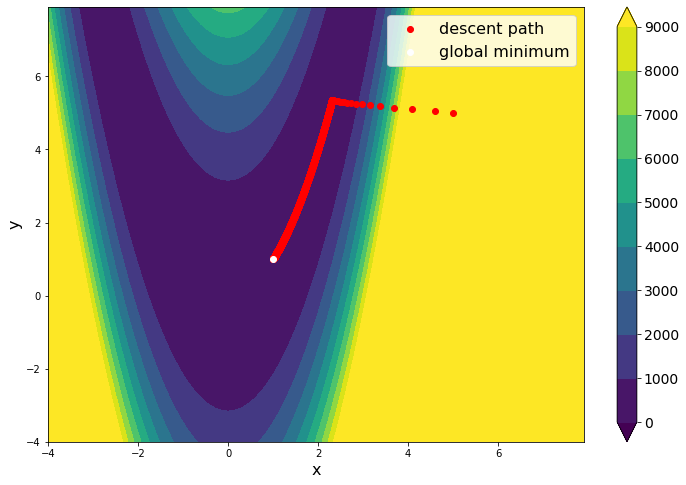

In [ ]:
x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Conjugate gradient',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 


ax.scatter((cgd.loc)[:,0],(cgd.loc)[:,1],marker='o',color='red',label='descent path')
ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

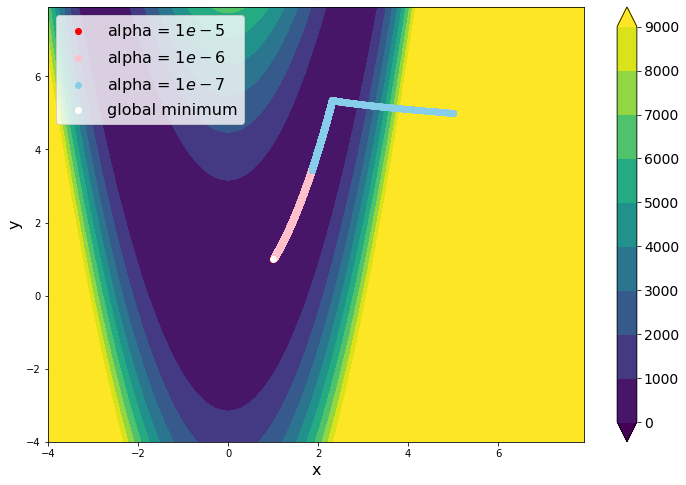

In [ ]:
# sensitivity to learning rate
alphas = [1e-5,1e-6,1e-7]
locs=[]

for alpha in alphas:
  cgd = conjugate_gradient()
  cgd.run_epoch(10000,alpha)
  locs.append(cgd.loc)

x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)
X, Y = np.meshgrid(x, y)
f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)
Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Gradient descent',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 

ax.scatter(locs[0][:,0],locs[0][:,1],marker='o',color='red',label='alpha = $1e-5$')
ax.scatter(locs[1][:,0],locs[1][:,1],marker='o',color='pink',label='alpha = $1e-6$')
ax.scatter(locs[2][:,0],locs[2][:,1],marker='o',color='skyblue',label='alpha = $1e-7$')

ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

##### adam


In [ ]:
class Adam:

  def __init__(self):
      self.w = np.array([5,5]).astype(float)

  @property
  def func_value(self):
    x,y = self.w
    return (1-x) ** 2 + 100*((y-x**2)**2)

  def _steepest_direction(self,location):
    x,y = location
    return np.array([2*(x-1) - 400*x*(y - x**2), 200*(y-(x**2))])

  def _moment_update(self,order,decay,g, moment):
    return (1-decay) * (g**order) + decay * moment

  def run_epoch(self,n_epoch,alpha):
    a = alpha
    beta1 = .9
    beta2 = .999
    eta = 1e-8
    k = 0
    mu = np.zeros((2,))
    v = np.zeros((2,))

    self.fun_val = []
    self.loc = []

    for _ in range(n_epoch):
      
      # collect statistics
      k+=1
      current_location = copy.deepcopy(self.w)
      self.fun_val.append(self.func_value)
      self.loc.append(current_location)

      # compute momentum
      g = self._steepest_direction(current_location)
      mu = self._moment_update(1,beta1,g, mu)
      v = self._moment_update(2,beta2,g, v)

      # descent
      up = alpha * (mu/(1-beta1**k))
      down = eta + np.sqrt(v/(1-beta2**k))
      self.w -= up / down
    
    self.loc = np.array(self.loc)

(0.0, 1000.0)

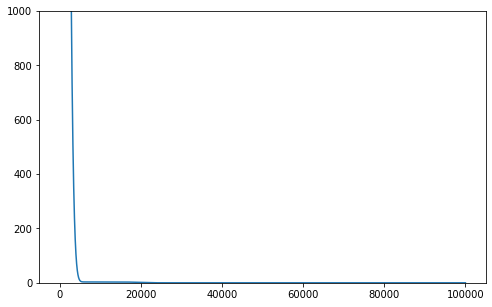

In [ ]:
ad = Adam()
ad.run_epoch(100000,1e-3)

# cgd.w
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.plot(ad.fun_val)
ax.set_ylim(0,1000)

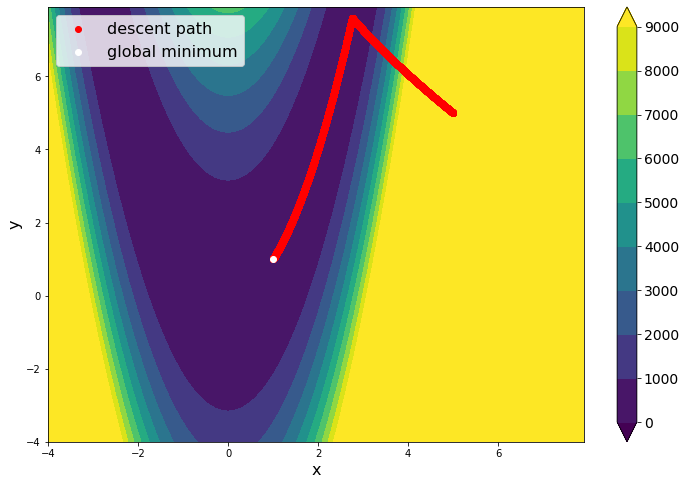

In [ ]:
x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('ADAM',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 


ax.scatter((ad.loc)[:,0],(ad.loc)[:,1],marker='o',color='red',label='descent path')
ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

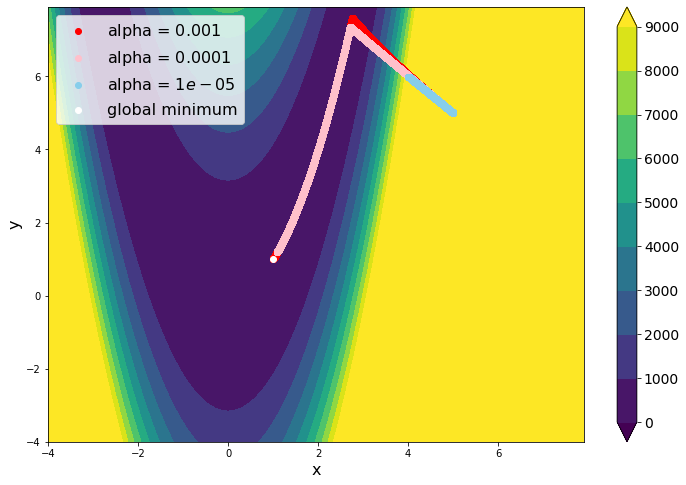

In [ ]:
# sensitivity to learning rate
alphas = [1e-3,1e-4,1e-5]
locs=[]

for alpha in alphas:
  ad = Adam()
  ad.run_epoch(100000,alpha)
  locs.append(ad.loc)

x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)
X, Y = np.meshgrid(x, y)
f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)
Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

# ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
# ax.set_title('Gradient descent',fontsize = 18)
# fig.colorbar(cf, ax=ax)
cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 

ax.scatter(locs[0][:,0],locs[0][:,1],marker='o',color='red',label=f'alpha = ${alphas[0]}$')
ax.scatter(locs[1][:,0],locs[1][:,1],marker='o',color='pink',label=f'alpha = ${alphas[1]}$')
ax.scatter(locs[2][:,0],locs[2][:,1],marker='o',color='skyblue',label=f'alpha = ${alphas[2]}$')

ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

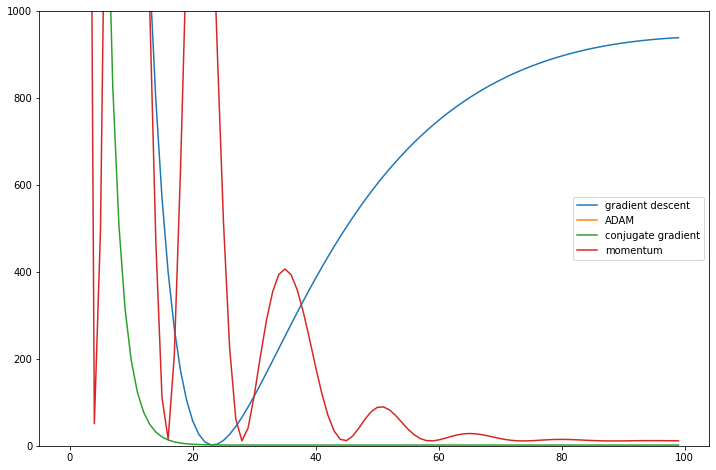

In [ ]:
val_range = 100

plt.figure(figsize=(12,8))
plt.plot(gd.fun_val[:val_range],label='gradient descent')
plt.plot(ad.fun_val[:val_range],label='ADAM')
plt.plot(cgd.fun_val[:val_range],label='conjugate gradient')
plt.plot(gdm.fun_val[:val_range],label='momentum')

plt.ylim(0,1000)
plt.legend()